## Actor-Critic: Actor_Critic Algorithm

In [1]:
import gym

# 定义环境
class MyWrapper(gym.Wrapper):
  def __init__(self):
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    super().__init__(env)
    self.env = env
    self.step_n = 0
  
  def reset(self):
    state, _ = self.env.reset()
    self.step_n = 0
    return state
    
  def step(self, action):
    state, reward, terminated, truncated, info = self.env.step(action)
    done = terminated or truncated
    self.step_n += 1
    if self.step_n >= 200:
      done = True
    return state, reward, done, info 
  
env = MyWrapper()
env.reset()

array([ 0.0119127 , -0.03810552,  0.03287515,  0.02317588], dtype=float32)

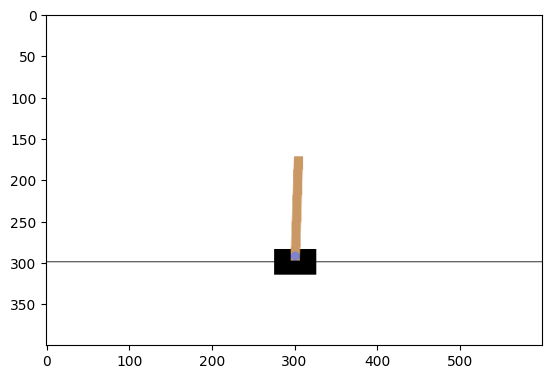

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

# 打印游戏
def show():
  plt.imshow(env.render())
  plt.show()
  
show()

In [ ]:
import torch

# 定义模型
model = torch.nn.Sequential(
  torch.nn.Linear(4, 128),
  torch.nn.ReLU(),
  torch.nn.Linear(128, 2),
  torch.nn.Softmax(dim=1),
)

"code changed here"
model_td = sequential = torch.nn.Sequential(
  torch.nn.Linear(4, 128),
  torch.nn.ReLU(),
  torch.nn.Linear(128, 1)
)

model(torch.randn(2, 4)), model_td(torch.randn(2, 4))
"code changed end"

(tensor([[0.3118, 0.6882],
         [0.4748, 0.5252]], grad_fn=<SoftmaxBackward0>),
 tensor([[0.1352],
         [0.1400]], grad_fn=<AddmmBackward0>))

In [4]:
import random

# 得到一个动作
def get_action(state):
  # 走神经网络，得到一个动作
  state = torch.FloatTensor(state).reshape(1, 4)

  # [1, 4] -> [1, 2]
  prob = model(state)
  
  # 根据概率选择一个动作
  action = random.choices(range(2), weights=prob[0].tolist(), k=1)[0]
  
  return action

get_action([1, 2, 3, 4])

1

In [5]:
# 得到一局游戏的数据
def get_data():
  states = []
  rewards = []
  actions = []
  "code changed here"
  next_states = []
  overs = []
  "code change end"
  
  
  # 初始化游戏
  state = env.reset()
  
  # 玩到游戏结束为止
  over = False
  while not over:
    # 根据当前状态得到一个动作
    action = get_action(state)
    
    # 执行动作，得到反馈
    next_state, reward, over, _ = env.step(action)
    
    # 记录数据样本
    states.append(state)
    rewards.append(reward)
    actions.append(action)
    "code changed here"
    next_states.append(next_state)
    overs.append(over)
    "code change end"
    
    # 更新游戏状态，开始下一个动作
    state = next_state
    
  "code changed here"
  # [b, 4]
  states = torch.FloatTensor(states).reshape(-1, 4)
  # [b, 1]
  rewards = torch.FloatTensor(rewards).reshape(-1, 1)
  # [b, 1]
  actions = torch.LongTensor(actions).reshape(-1, 1)
  # [b, 4]
  next_states = torch.FloatTensor(next_states).reshape(-1, 4)
  # [b, 1]
  overs = torch.LongTensor(overs).reshape(-1, 1)
  "code end here"
  
  return states, rewards, actions, next_states, overs

get_data()

C:\Users\fanyu\AppData\Local\Temp\ipykernel_29384\3095393415.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:204.)
  states = torch.FloatTensor(states).reshape(-1, 4)


(tensor([[-3.8261e-03, -7.3109e-03,  3.1384e-02,  3.6311e-02],
         [-3.9723e-03,  1.8735e-01,  3.2110e-02, -2.4631e-01],
         [-2.2538e-04,  3.8200e-01,  2.7184e-02, -5.2869e-01],
         [ 7.4145e-03,  5.7673e-01,  1.6610e-02, -8.1269e-01],
         [ 1.8949e-02,  7.7162e-01,  3.5677e-04, -1.1001e+00],
         [ 3.4381e-02,  9.6673e-01, -2.1645e-02, -1.3927e+00],
         [ 5.3716e-02,  1.1621e+00, -4.9499e-02, -1.6920e+00],
         [ 7.6958e-02,  9.6760e-01, -8.3339e-02, -1.4152e+00],
         [ 9.6310e-02,  1.1637e+00, -1.1164e-01, -1.7327e+00],
         [ 1.1958e-01,  1.3599e+00, -1.4630e-01, -2.0579e+00],
         [ 1.4678e-01,  1.5561e+00, -1.8746e-01, -2.3921e+00]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]),
 tensor([[1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [0],
         [1],
         [1],
         [1]

In [6]:
from IPython import display

def test(play):
  #初始化游戏
  state = env.reset()
  
  #记录反馈值的和,这个值越大越好
  reward_sum = 0
  
  #玩到游戏结束为止
  over = False
  while not over:
    #根据当前状态得到一个动作
    action = get_action(state)
    
    #执行动作,得到反馈
    state, reward, over, _ = env.step(action)
    reward_sum += reward
    
    # 打印动画
    if play and random.random() < 0.2: # 跳帧
      display.clear_output(wait=True)
      show()
      
  return reward_sum

test(play=False)

28.0

In [7]:
def train():
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  optimizer_td = torch.optim.Adam(model_td.parameters(), lr=1e-2)
  loss_fn = torch.nn.MSELoss()
  
  # 玩N局游戏，每句游戏训练一次
  for epoch in range(1000):
    # 玩一局游戏，得到数据
    # states -> [b, 4]
    # rewards -> [b, 1]
    # actions -> [b, 1]
    # next_states -> [b, 4]
    # overs -> [b, 1]
    states, rewards, actions, next_states, overs = get_data()
    
    # 计算values, targets
    # [b, 4] -> [b, 1]
    values = model_td(states)
    
    # [b, 4] -> [b, 1]
    targets = model_td(next_states) * 0.98
    # [b, 1] * [b, 1] -> [b, 1]
    targets *= (1 - overs)
    # [b, 1] + [b, 1] -> [b, 1]
    targets += rewards
    
    # 时序差分误差
    # [b, 1] - [b, 1] -> [b, 1]
    delta = (targets - values).detach()
    
    # 重新计算对应动作的概率
    # [b, 4] -> [b, 2]
    probs = model(states)
    # [b, 2] -> [b, 1]
    probs = probs.gather(dim=1, index=actions)
    
    # 根据策略梯度算法的导函数实现
    # 只是把公式中的reward_sum替换为时序差分的误差
    # [b, 1] * [b, 1] -> [b, 1] -> scalar
    loss = (-probs.log() * delta).mean()
    
    # 时序差分的loss就是简单的value和target求mse loss即可
    loss_td = loss_fn(values, targets.detach())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    optimizer_td.zero_grad()
    loss_td.backward()
    optimizer_td.step()
    
    if epoch % 100 == 0:
      test_result = sum([test(play=False) for _ in range(10)]) / 10
      print(epoch, test_result)
      
train()

0 20.4
100 23.0
200 48.7
300 93.4
400 116.2
500 166.5
600 191.0
700 198.9
800 200.0
900 200.0


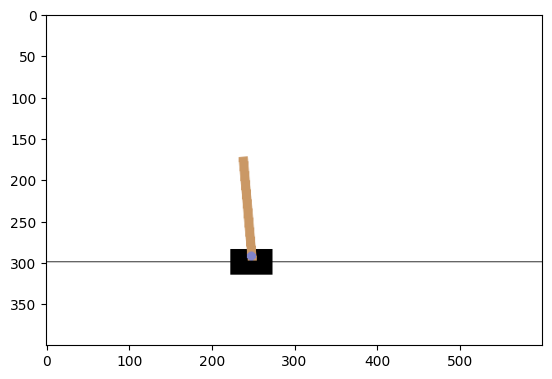

200.0

In [8]:
test(play=True)